In [2]:
%config IPCompleter.greedy=True


In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [22]:
img = cv2.imread('samples/golf_ball_2.jpg')
img = img[:,:,::-1]
img_show=img.copy()
blur = cv2.GaussianBlur(img,(5,5),0)

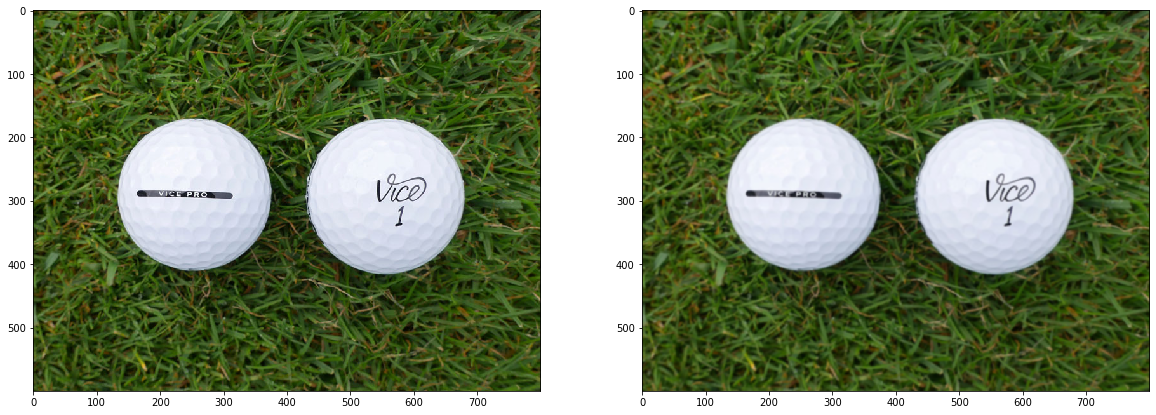

In [23]:
fig,ax=plt.subplots(1,2,figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(blur)

In [7]:
r= ([200,200,200],[255,255,255])
lower = np.array(r[0], dtype="uint8")
upper = np.array(r[1], dtype="uint8")
lower

array([200, 200, 200], dtype=uint8)

In [8]:
mask = cv2.inRange(img, lower, upper)


In [10]:
output = cv2.bitwise_and(img, img, mask=mask)


In [11]:
dilated=cv2.dilate(output,None,iterations=1)


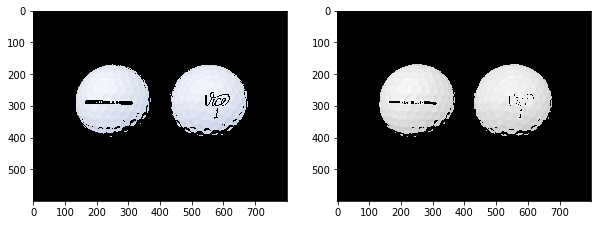

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10, 10))
ax[0].imshow(output)
ax[1].imshow(dilated[:,:,0],cmap='gray')

In [14]:
contours, hierarchy = cv2.findContours(dilated[:,:,0],  
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
print(len(contours))
img_show=cv2.drawContours(img_show, contours, -1, (0, 255, 0), 3) 
img_show.shape

16


(600, 800, 3)

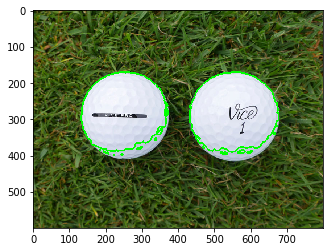

In [15]:
plt.imshow(img_show)

In [16]:
contour_sizes = [(cv2.contourArea(contour)) for contour in contours]
contour_sizes

[4.0,
 10.0,
 24.0,
 79.5,
 4.0,
 42.0,
 117.5,
 4.0,
 9.0,
 48.0,
 21.5,
 10.0,
 4.0,
 18.0,
 42026.5,
 39904.5]

In [28]:
crops =[]
for i in range(len(contour_sizes)):
    if (contour_sizes[i]>2000):
        x, y, w, h = cv2.boundingRect(contours[i])
        x2 = int(x + w)
        y2 = int(y + h)
        crops.append(img[y:y2,x:x2,:])
        cv2.rectangle(img_show, (int(x), int(y)), (x2, y2), (0, 255, 255), 2)

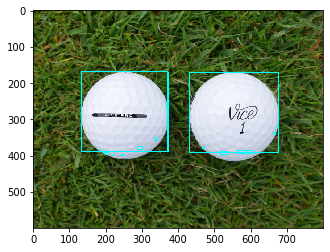

In [29]:
plt.imshow(img_show)

In [30]:
len(crops)

2

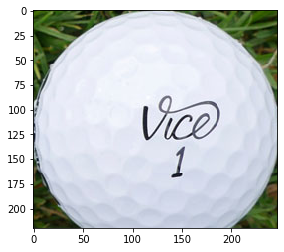

In [34]:
plt.imshow(crops[0])

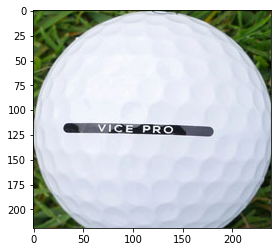

In [35]:
plt.imshow(crops[1])